<a href="https://colab.research.google.com/github/HariniJay01/Naan-Mudhalvan-Internship/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
car=pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")

In [143]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [144]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [145]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [146]:
car.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


EDA

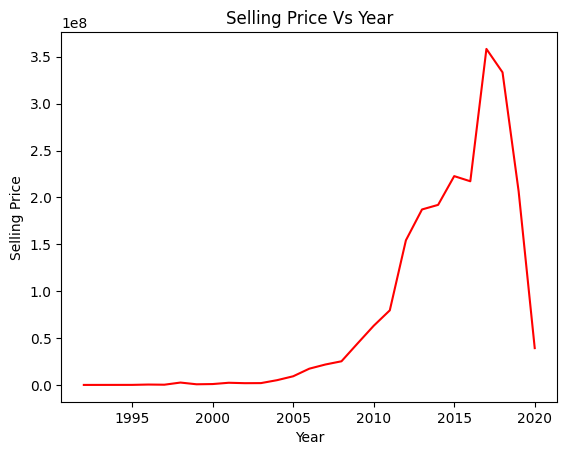

In [147]:
sp=car.groupby('year')['selling_price'].sum()
plt.plot(sp.index, sp.values, color='Red')
plt.title("Selling Price Vs Year")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

<ipython-input-148-99246f5481ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm=car.corr()


<Axes: >

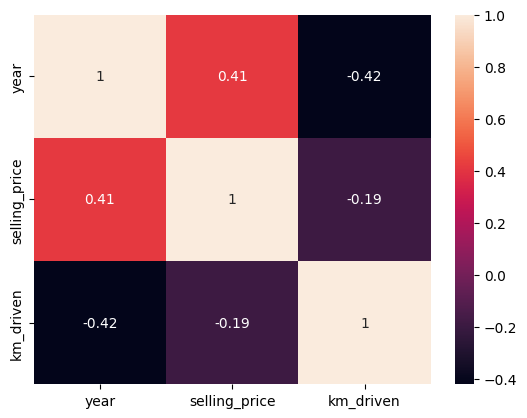

In [148]:
cm=car.corr()
sns.heatmap(cm, annot=True)

<Axes: ylabel='Density'>

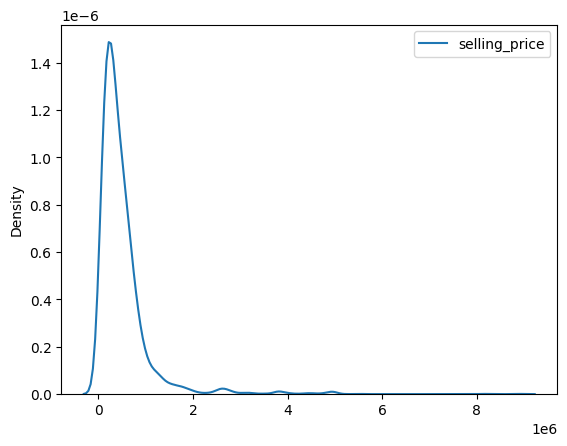

In [149]:
sns.kdeplot(car[['selling_price']])

<Axes: >

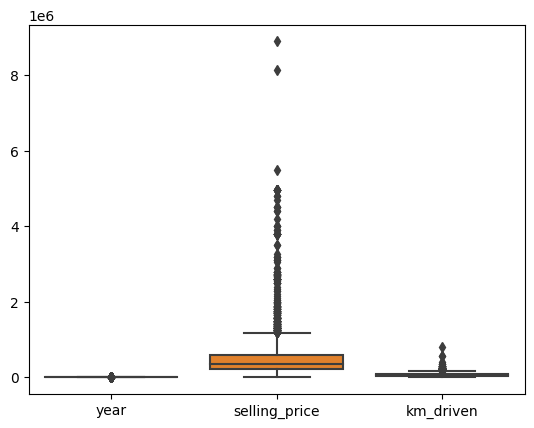

In [150]:
sns.boxplot(car)

In [151]:
slp=car.selling_price
x=slp.quantile(0.25)
y=slp.quantile(0.75)
iqr=y-x
l=x-1.5*iqr
u=y+1.5*iqr
slp[(slp<l)|(slp>u)]
car.selling_price[car.selling_price<l]
car.selling_price[car.selling_price>u]=u
print(u)

1186875.375


<ipython-input-151-ac6e239a4b7b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car.selling_price[car.selling_price>u]=u


<Axes: xlabel='selling_price', ylabel='Density'>

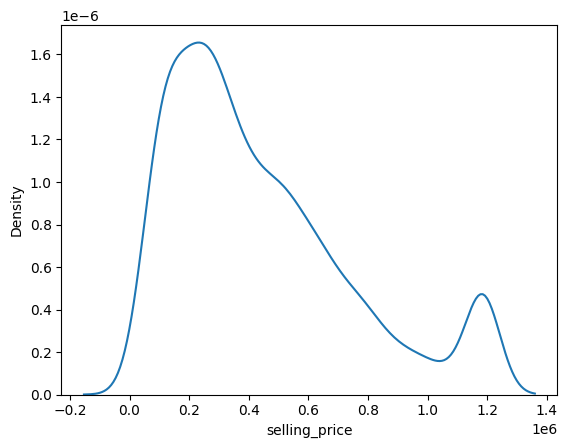

In [152]:
sns.kdeplot(car.selling_price)

<Axes: >

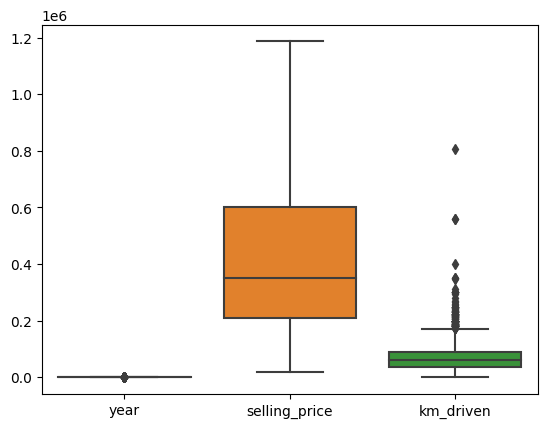

In [153]:
sns.boxplot(car)

<Axes: ylabel='Density'>

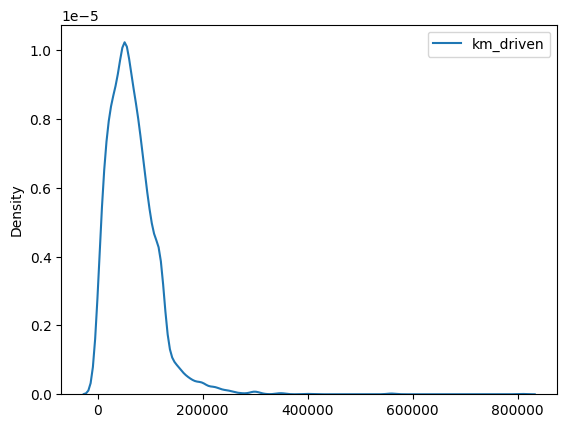

In [154]:
sns.kdeplot(car[['km_driven']])

<Axes: >

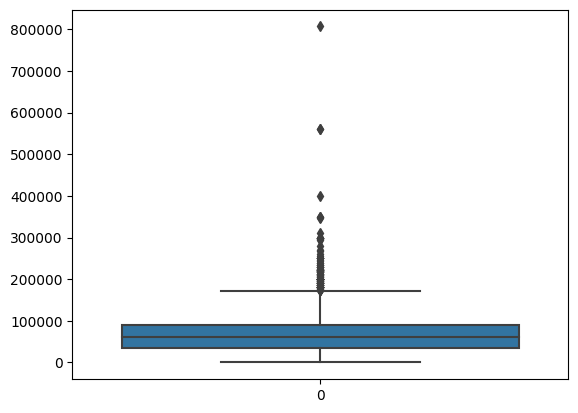

In [155]:
sns.boxplot(car.km_driven)

In [156]:
kd=car.km_driven
x=kd.quantile(0.25)
y=kd.quantile(0.75)
iqr=y-x
l=x-1.5*iqr
u=y+1.5*iqr
slp[(slp<l)|(slp>u)]
car.km_driven[car.km_driven<l]
car.km_driven[car.km_driven>u]=u
print(u)

172500.0


<ipython-input-156-dc43b5bb3f60>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car.km_driven[car.km_driven>u]=u


PREPROCESSING

In [157]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse_output=False)
fuel=car[["fuel"]]
enc.fit(fuel)
fuel_enc=enc.transform(fuel)
fuel_enc_df=pd.DataFrame(fuel_enc, columns=car["fuel"].unique())
car=pd.concat([car,fuel_enc_df],axis=1)

In [158]:
owner=car[['owner']]
enc.fit(owner)
owner_enc=enc.transform(owner)
owner_enc_df=pd.DataFrame(owner_enc,columns=car["owner"].unique())
car=pd.concat([car,owner_enc_df],axis=1)

In [159]:
tran=car[['transmission']]
enc.fit(tran)
tran_enc=enc.transform(tran)
tran_enc_df=pd.DataFrame(tran_enc,columns=car["transmission"].unique())
car=pd.concat([car,tran_enc_df],axis=1)

In [160]:
st=car[['seller_type']]
enc.fit(st)
st_enc=enc.transform(st)
st_enc_df=pd.DataFrame(st_enc,columns=car["seller_type"].unique())
car=pd.concat([car,st_enc_df],axis=1)

In [161]:
X=car.drop(["name","fuel","seller_type","transmission","owner","selling_price"],axis=1)
Y=car.selling_price


In [162]:
from sklearn.feature_selection import VarianceThreshold
v=VarianceThreshold(threshold=0)
v.fit(X)

VarianceThreshold(threshold=0)

In [163]:
v.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [164]:
def corr(car, threshold):
  corr_column=set()
  corr=car.corr()
  for a in range(len(corr.columns)):
    for b in range(a):
      if abs(corr.iloc[a,b])>threshold:
        col= corr.columns[a]
        corr_column.add(col)
  return corr_column

cld=corr(X,0.5)
cld

{'Automatic', 'Dealer', 'Electric', 'Fourth & Above Owner'}

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [166]:
X_train

,year,km_driven,Petrol,Diesel,CNG,LPG,Electric,First Owner,Second Owner,Fourth & Above Owner,Third Owner,Test Drive Car,Manual,Automatic,Individual,Dealer,Trustmark Dealer
159,2015,172500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4334,2012,170000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1657,2006,110000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2188,2015,66521,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
581,2016,41000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2013,58500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3264,2012,110000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1653,2016,22000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2607,2015,70000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [167]:
tran=car[['transmission']]
enc.fit(tran)
tran_enc=enc.transform(tran)
tran_enc_df=pd.DataFrame(tran_enc,columns=car["transmission"].unique())
car=pd.concat([car,tran_enc_df],axis=1)

In [168]:
st=car[['seller_type']]
enc.fit(st)
st_enc=enc.transform(st)
st_enc_df=pd.DataFrame(st_enc,columns=car["seller_type"].unique())
car=pd.concat([car,st_enc_df],axis=1)

1. LINEAR REGRESSION

In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=1)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
r2=r2_score(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)

In [170]:
print("R-squared error:",r2)
print("Mean absolute error:",mae)

R-squared error: 0.5840787851223492
Mean absolute error: 149841.7258320415


2. POLYNOMIAL REGRESSION

In [171]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
poly=PolynomialFeatures(degree=2)
X_poly_train=poly.fit_transform(X_train)
X_poly_test=poly.fit_transform(X_test)
poly_reg=LinearRegression()
poly_reg.fit(X_poly_train,Y_train)
Y_pred=poly_reg.predict(X_poly_test)
r2_score=r2_score(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)


In [172]:
print("R-squared error:",r2)
print("Mean absolute error:",mae)

R-squared error: 0.5840787851223492
Mean absolute error: 135080.22907161934


3. RANDOM FOREST

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
rf_regressor=RandomForestRegressor(n_estimators=100,random_state=42)
rf_regressor.fit(X_train,Y_train)
Y_pred=rf_regressor.predict(X_test)
r2=r2_score(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)

In [207]:
print("R-squared error:",r2)
print("Mean absolute error:",mae)
prediction=416900.0

R-squared error: 0.6716133165652107
Mean absolute error: 118201.63394036403


In [203]:
from sklearn.preprocessing import OneHotEncoder

enc= OneHotEncoder(handle_unknown='ignore',sparse_output=False)
def preprocess_iP(year,km_driven,fuel,seller_type,transmission,owner,enc):
  input_df=pd.DataFrame({'year':[year],'km_driven':[km_driven],'fuel':[fuel],'seller_type':[seller_type],'transmission':[transmission],'owner':[owner]})
  car=pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")
  
  enc.fit(car[["fuel"]])
  fuel_enc=enc.transform(input_df[["fuel"]])
  fuel_enc_df=pd.DataFrame(fuel_enc.transpose(), columns=car["fuel"].unique())
  car=pd.concat([car,fuel_enc_df],axis=1)

  st=car[['seller_type']]
  enc.fit(st)
  st_enc=enc.transform(st)
  st_enc_df=pd.DataFrame(st_enc.transpose(),columns=car["seller_type"].unique())
  car=pd.concat([car,st_enc_df],axis=1)

  tran=car[['transmission']]
  enc.fit(tran)
  tran_enc=enc.transform(tran)
  tran_enc_df=pd.DataFrame(tran_enc.transpose(),columns=car["transmission"].unique())
  car=pd.concat([car,tran_enc_df],axis=1)

  owner=car[['owner']]
  enc.fit(owner)
  owner_enc=enc.transform(owner)
  owner_enc_df=pd.DataFrame(owner_enc.transpose(),columns=car["owner"].unique())
  car=pd.concat([car,owner_enc_df],axis=1)  


  ip_df=pd.join([ip_df,fuel_enc_df,st_enc_df,tran_enc_df,owner_enc_df])
  ip_df.drop(['fuel','seller_type','transmission','owner'],axis=1,inplace=True)
  return ip_df

In [204]:
def predictor(ip_data,enc):
  preprocessed_iP=preprocess_iP(ip_data['year'],ip_data['km_driven'],ip_data['fuel'],ip_data['seller_type'],ip_data['transmission'],ip_data['owner'],enc)
  prediction=rf_regressor.predict(preprocessed_iP)
  return prediction

In [209]:
ip_data={
'year':2007,
'km_driven':50000,
'fuel':'petrol',
'seller_type':'Individual',
'transmission':'Manual',
'owner':'First owner'
}
print("PREDICTED SELLING PRICE:Rs.",prediction)


PREDICTED SELLING PRICE:Rs. 416900.0
